## Numpy在数据分析中的简单应用
### 以Dataquest numpy部分为例  
Dataquest没有给出教程用的数据集，找了一个只有年份、国家和年度人均酒消耗量的数据来练手

#### 用genfromtxt读取csv，存储数据到数组中
1. delimiter：分隔符  
2. dtype：数据类型  
3. skip_header：numpy会自动把所有数据转成同一格式，跳过表头。避免表头被转化成nan (numpy在转化数据时，把无法转化为数字的数据列为nan)。

In [30]:
import numpy as np
alcohol = np.genfromtxt("alcohol.csv", delimiter=",", dtype="U75", skip_header=True)

#### 用numpy切片取子集粗看数据特征，类似于R中的head()
数据由年份、国家、酒消耗量三列构成。

In [31]:
alcohol[0:10,:] 

array([[u'2008', u'Afghanistan', u'0.03'],
       [u'2005', u'Afghanistan', u''],
       [u'2008', u'Albania', u'7.29'],
       [u'2005', u'Albania', u''],
       [u'2008', u'Algeria', u'0.69'],
       [u'2005', u'Algeria', u''],
       [u'2008', u'Andorra', u'10.17'],
       [u'2005', u'Andorra', u''],
       [u'2008', u'Angola', u'5.57'],
       [u'2005', u'Angola', u'']], 
      dtype='<U75')

#### 发现2005年的酒消耗数据全都缺失，决定把05年的所有数据删除。
另外，numpy中的布尔索引可以遵循多个条件。例子：在数组alcohol中，留下2008年除阿尔及利亚以外的所有国家数据

In [32]:
year08 = (alcohol[:,0]=='2008')&(alcohol[:,1]!='Algeria')
alcohol08 = alcohol[year08]
alcohol08[0:10,:]

array([[u'2008', u'Afghanistan', u'0.03'],
       [u'2008', u'Albania', u'7.29'],
       [u'2008', u'Andorra', u'10.17'],
       [u'2008', u'Angola', u'5.57'],
       [u'2008', u'Antigua and Barbuda', u'8.17'],
       [u'2008', u'Argentina', u'9.35'],
       [u'2008', u'Armenia', u'13.66'],
       [u'2008', u'Australia', u'10.21'],
       [u'2008', u'Austria', u'12.4'],
       [u'2008', u'Azerbaijan', u'13.34']], 
      dtype='<U75')

#### 替换数据 (可以用来剔除NA)
例子：把阿尔巴尼亚的酒消耗量改为3.28。  
这里改的是某一列某一行的值，那么在改值的时候，记得先索引到目标区域，再使用布尔索引，最后赋值。

In [33]:
albania_liter = alcohol08[:,1]=='Albania'
alcohol08[:,2][albania_liter]='3.28'
#这里如果不索引到第3列，algeria这一列的所有值都会被改成‘3.28’
alcohol08[0:10,:]

array([[u'2008', u'Afghanistan', u'0.03'],
       [u'2008', u'Albania', u'3.28'],
       [u'2008', u'Andorra', u'10.17'],
       [u'2008', u'Angola', u'5.57'],
       [u'2008', u'Antigua and Barbuda', u'8.17'],
       [u'2008', u'Argentina', u'9.35'],
       [u'2008', u'Armenia', u'13.66'],
       [u'2008', u'Australia', u'10.21'],
       [u'2008', u'Austria', u'12.4'],
       [u'2008', u'Azerbaijan', u'13.34']], 
      dtype='<U75')

#### 转换数据类型
目前酒消耗量的数据还是字符型，不能用来运算。这里用variable_name.astype()来转换成浮点数，并把数据分配给一个新的变量。

In [34]:
alcoholfloat = alcohol08[:,2]
alcoholfloat = alcohol08[:,2].astype(float)

#### 用numpy进行计算
用上一步转换好数据类型的alcoholfloat来计算平均值，最大值或求和。

In [35]:
alcoholfloat.sum()

1246.0700000000002

### 总结Numpy在数据分析中的优缺点
1. 优点：  
a.数据计算方便 vector.sum()  
b.数据索引更快更简单 Numpy slice  
c.能够快速进行数据类型转换 vector.astype()  
2. 缺点：  
a.数组里的所有数据必须是同一类型，也妨碍了快速数据处理   
b.用数字来索引行列值，很久以后再回看，忘记哪列数字代表哪个变量了

## Numpy中看着没啥用但有点意思的小练习
练习来自[scipy-lectures](http://www.scipy-lectures.org/intro/numpy/exercises.html)和yongle推荐的[numpy exercise 100](http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html)

### 1. 用numpy数组来处理图像 –– 脆面君的黑白模糊大头贴
应用：以后就可以批量处理图片啦

#### 黑白干脆面
用到了matplotlib和pylab库
- matplotlib.image.imread(pic_address) 导入图片:  
导入的图片是以浮点数array形式存储的，辣么就可以用numpy处理数组的特性来修图啦
- pic_name[:, :, 0]，用numpy数组索引图片数组，显示图片后粗线反相干脆面 #三个索引值分别代表图片RGB三个颜色通道
- pylab.imshow()显示图片，黑白干脆面粗线:   
plt.imshow(pic_name, cmap = plt.cm.gray) #cm是colormap的简称


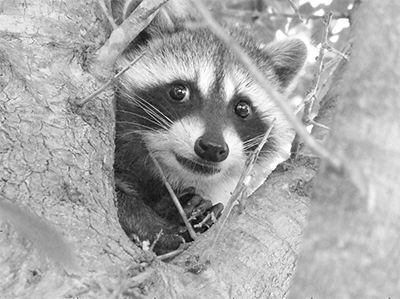

In [16]:
import pylab as plt
import matplotlib
import numpy as np
from IPython.display import Image
silly_racoon = matplotlib.image.imread('silly_racoon.jpg')
silly_racoon = silly_racoon[:,:,0]
plt.imshow(silly_racoon, cmap=plt.cm.gray)
# 修改cmap颜色，会粗线奇怪的干脆面 cmap = 'hot'; cmap = 'spectral'
# plt.show()
Image('bwracoon.png')

#### 干脆面的大头贴
用到了numpy数组的切片功能，裁剪图片

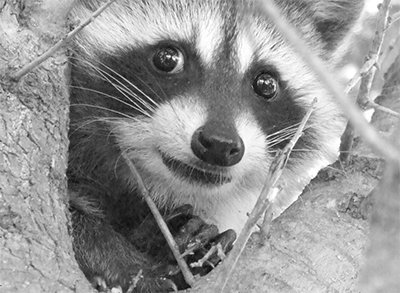

In [17]:
crop_racoon = silly_racoon[350:-350, 450:-450]
plt.imshow(crop_racoon, cmap=plt.cm.gray)
# plt.show()
Image('cropracoon.png')

#### 添加边框
- 用shape和np.ogrid[0:sy, 0:sx]，查看图像大小
- 根据图像大小得出图像中心点，用中心点画圆加边框~
- 用numpy布尔索引，设置圆圈以外的部分为0，画出边框

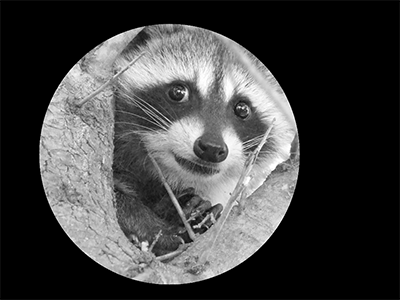

In [18]:
sy, sx = silly_racoon.shape
y, x = np.ogrid[0:sy, 0:sx]
y.shape, x.shape
centerx, centery = (1100, 1000)
mask = ((y - centery)**2 + (x - centerx)**2) > 830**2
# 830**2显示的是边框内的图像大小
silly_racoon[mask] = 0
plt.imshow(silly_racoon, cmap=plt.cm.gray)
# plt.show()
Image('frameracoon.png')

#### 调整图像对比度

In [29]:
hist = plt.hist(silly_racoon.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
imgplot = plt.imshow(silly_racoon, clim=(0.0, 0.7))
plt.imshow(silly_racoon, cmap=plt.cm.gray)
plt.show()

### 和numpy无关但也挺好玩的matplotlib修图

#### 马赛克干脆面
马赛克干脆面和朦胧干脆面不能用数组来处理，这里也就暂时没有用到numpy
- 用pillow库打开本地图片 (此处地址已省略)
- pic_name.thumbnail设置缩略图
- 在pylab.imshow中设置interpolation，马赛克干脆面粗线

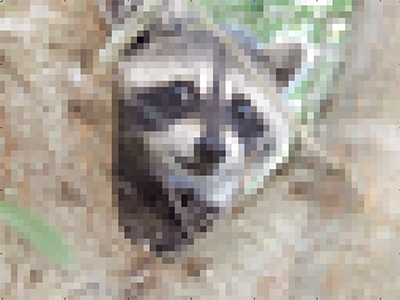

In [27]:
import PIL
img = PIL.Image.open('../Data102/assignment/2w/silly_racoon.jpg')
img.thumbnail((64,64), PIL.Image.ANTIALIAS)
imgplot = plt.imshow(img,interpolation = 'nearest')
plt.show()
Image('mosaicracoon.png')

#### 朦胧干脆面

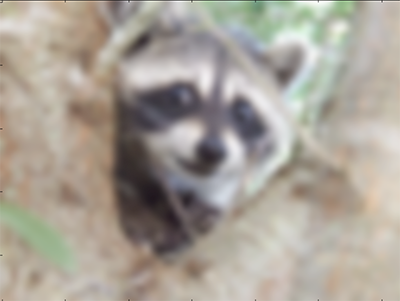

In [25]:
imgplot = plt.imshow(img, interpolation="bicubic")
plt.show()
Image('blurracoon.png')